In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df=pd.read_csv("bigmart_data.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
"""Retail is another industry which extensively uses analytics to optimize business processes. 
Tasks like product placement, inventory management, customized offers, product bundling, etc. 
are being smartly handled using data science techniques. As the name suggests,
this data comprises of transaction records of a sales store.
This is a regression problem. The data has 8523 rows of 12 variables."""
print()

Problem: Predict the sales of a store. Let’s have a look at the Big Mart Sales data and build a Linear Regression Model in the Live Coding window below.

import library pandas and numpy to manip the data matplotlib and seaborn for the visualization load data exploring data and analys data cleaning data visualization feature selection feature transformation split data machine learning algo

In [6]:
"""
Problem: Predict the sales of a store.
Let’s have a look at the Big Mart Sales data and build a Linear Regression Model in the Live Coding window below.

import library
pandas and numpy to manip the data
matplotlib and seaborn for the visualization
load data
exploring data and analys
data cleaning
data visualization
feature selection
feature transformation
split data
machine learning algo"""
print()

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=8523, step=1)

In [12]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False).head()

Outlet_Size         2410
Item_Weight         1463
Item_Identifier        0
Item_Fat_Content       0
Item_Visibility        0
dtype: int64

Text(0.5, 1.0, 'type of our data')

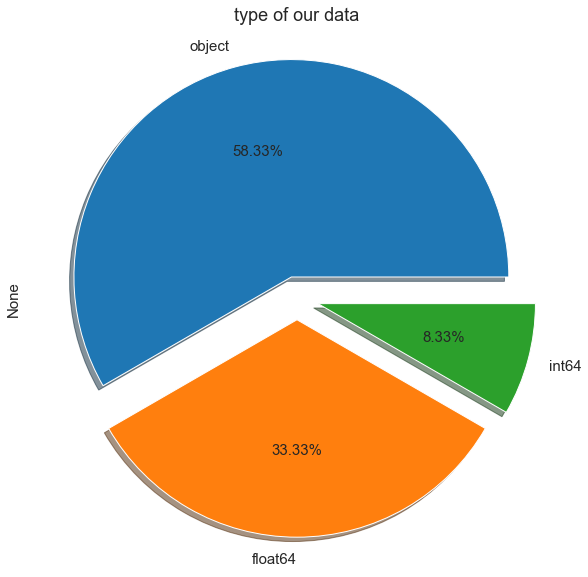

In [14]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%.2f%%',shadow=True)
plt.title('type of our data')

In [15]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [16]:
df.isnull().sum().sum() # We will get overall null values in our dataset

3873

In [17]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Columns Item_Weight & Outlet_Size has missing values

In [18]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

We can fill the na values with either mean or mode. As Item_Weight has numerical columns we can use mean or median to to fill the values.

In [19]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [20]:
df.Item_Weight.isnull().sum()

0

In [21]:
df.Outlet_Size.isnull().sum()

2410

In [22]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
df.Outlet_Size.fillna('Medium', inplace=True)

In [24]:
df.Outlet_Size.isnull().sum()

0

In [25]:
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

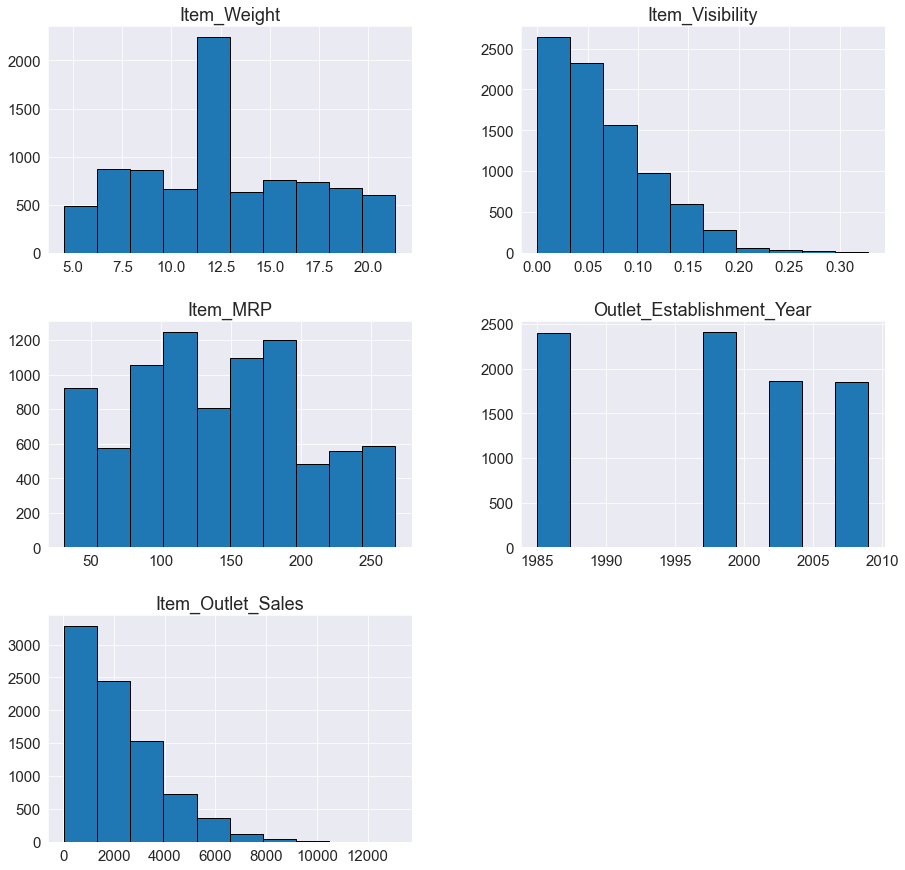

In [26]:
df.hist(figsize=(15,15), edgecolor='black')

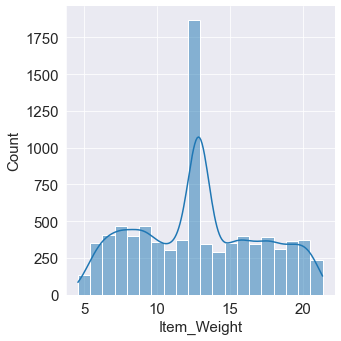

In [27]:
sns.displot(df.Item_Weight, kde=True, bins=20)

In [30]:
df.Item_Weight.value_counts().sort_values(ascending=False)

5.400000        1
7.685000        1
6.520000        1
9.420000        1
7.275000        2
             ... 
11.800000      76
13.650000      77
17.600000      82
12.150000      86
12.857645    1463
Name: Item_Weight, Length: 416, dtype: int64

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

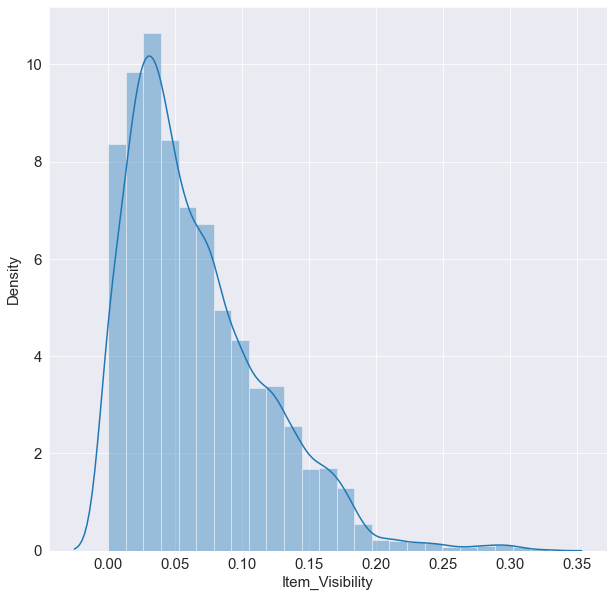

In [35]:
sns.distplot(df.Item_Visibility,kde=True,bins=25)

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

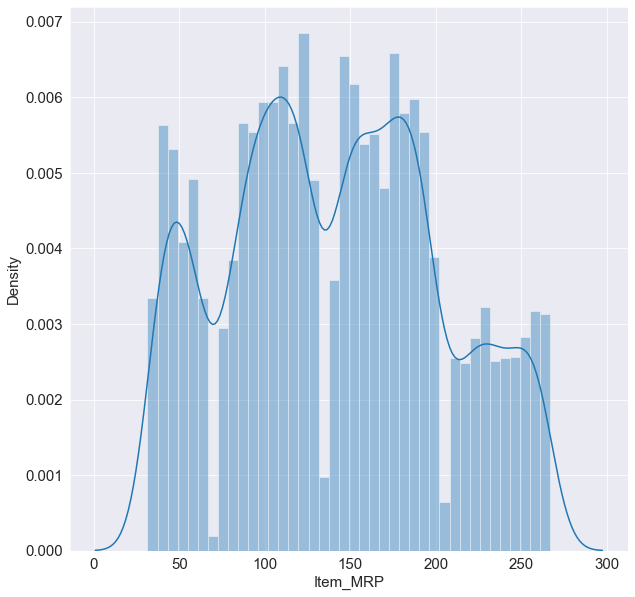

In [37]:
sns.distplot(df.Item_MRP,kde=True,bins=25)

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

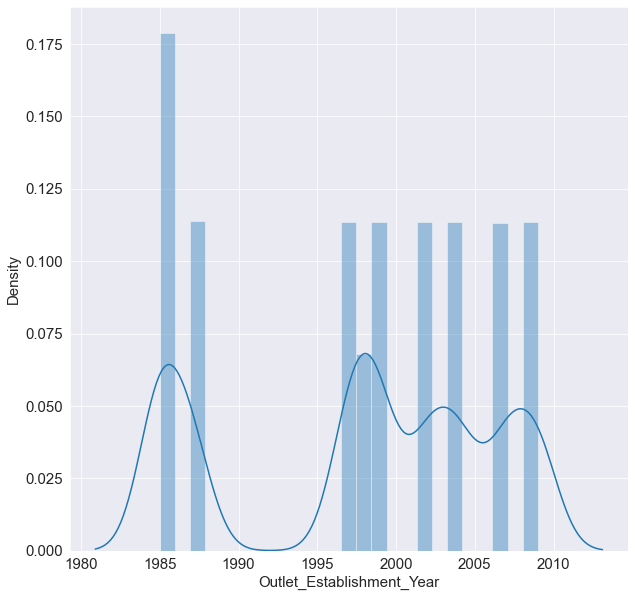

In [39]:
sns.distplot(df.Outlet_Establishment_Year,kde=True,bins=25)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

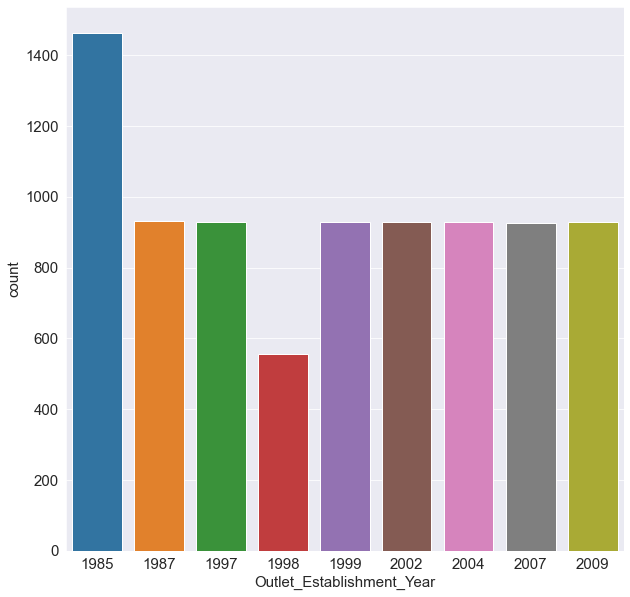

In [40]:
sns.countplot(x='Outlet_Establishment_Year',data=df,)

In [41]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:ylabel='Outlet_Establishment_Year'>

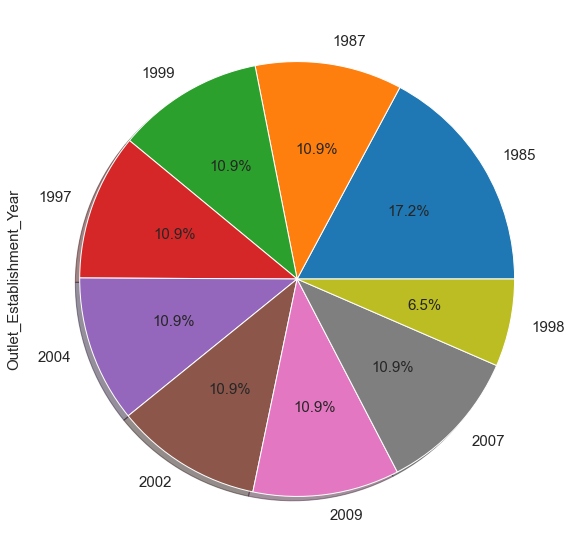

In [42]:
df.Outlet_Establishment_Year.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

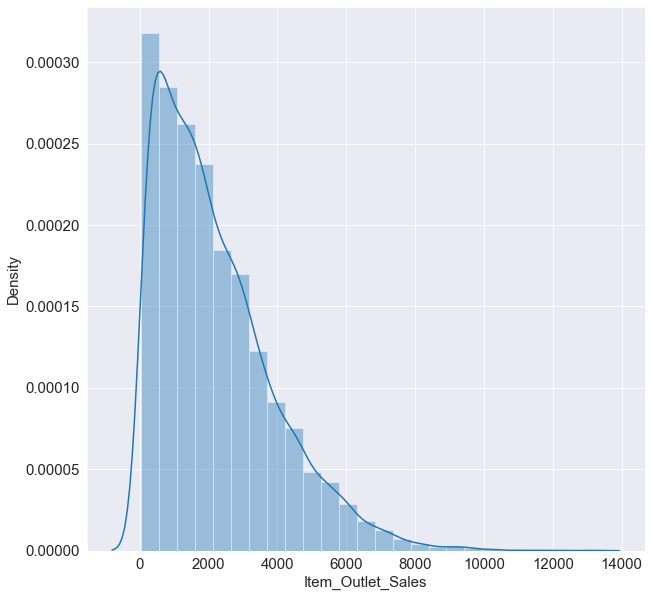

In [43]:
sns.distplot(df.Item_Outlet_Sales,kde=True,bins=25)

### Data Predcition

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
"""
feature selection
columns that we gonna delete
Item_Identifier : Unique product ID ==> delete
Outlet_Identifier : Unique store ID ==> delete
"""
print()

In [46]:
df.Item_Identifier.value_counts().sum()

8523

In [47]:
df.Outlet_Identifier.value_counts().sum()

8523

It make sense to delete these two columns as they aree just unique product Ids

In [48]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [52]:
len(df.columns)
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### Transform data from categorical to numerical

We do this beacuse, computing with numerical values are more efficient tha computing categorial values & we can use label encoder or pandas dummies for this

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [59]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [60]:
df.Item_Fat_Content = le.fit_transform(df.Item_Fat_Content)

In [61]:
df.Item_Fat_Content.value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

It has transformed as follows:
1. 0 ==> LF
2. 1 ==> Low Fat
3. 2 ==> Regular
4. 3 ==> low fat
5. 4 ==> reg

In [62]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [63]:
df.Item_Type = le.fit_transform(df.Item_Type)

In [64]:
df.Item_Type.value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [65]:
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [66]:
df.Outlet_Size = le.fit_transform(df.Outlet_Size)

In [67]:
df.Outlet_Size.value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [68]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [69]:
df.Outlet_Location_Type = le.fit_transform(df.Outlet_Location_Type)

In [70]:
df.Outlet_Location_Type.value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [71]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [72]:
df.Outlet_Type = le.fit_transform(df.Outlet_Type)

In [73]:
df.Outlet_Type.value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [76]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

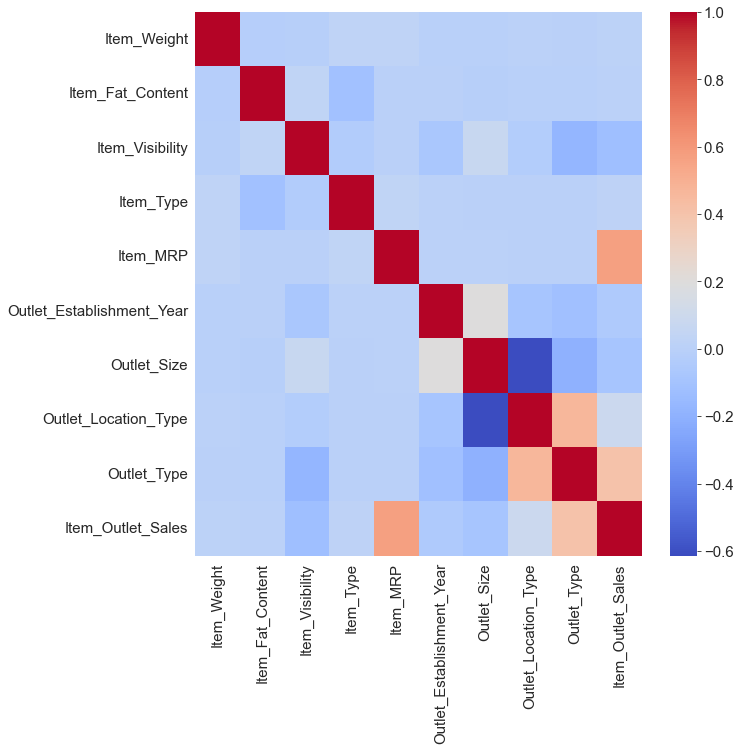

In [78]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [79]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


We will predict tha values of Item_Outlet_Sales

### train_test_split

In [80]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df.Item_Outlet_Sales

In [86]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,1998,1,2,0
4,8.93,1,0.000000,9,53.8614,1987,0,2,1


In [87]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [89]:
print(X.shape)
print(y.shape)

(8523, 9)
(8523,)


In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

### Selecting Model

1. Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

LinearRegression()

In [93]:
#Score/Accuracy
print("Accuracy --> ", LR_model.score(X_test, y_test)*100)

Accuracy -->  48.85272173621652


2. RandomForestRegressor

In [95]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=400)

#Fit
RFR_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400)

In [97]:
#Score/Accuracy
print("Accuracy --> ", RFR_model.score(X_test, y_test)*100)

Accuracy -->  53.34013294835205


3. Gradient Boosting Regressor

In [99]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor(n_estimators=100, max_depth=4)

#Fit
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [100]:
print("Accuracy --> ", GBR_model.score(X_test, y_test)*100)

Accuracy -->  57.58782500222427


4. XGBRegressor

In [101]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

XGBRegressor_model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
XGBR_predictions = XGBRegressor_model.predict(X_test)

In [105]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,XGBR_predictions)))

Mean Absolute Error : 818.5440978246982
